### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [50]:
data = pd.read_csv('data/coupons.csv')

In [51]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null object
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
car                     108 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50     

2. Investigate the dataset for missing or problematic data.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


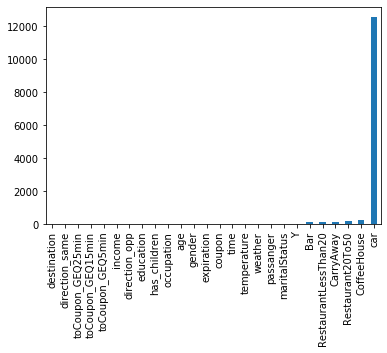

In [52]:
# Arrange the columns based on the quantity of null entries in each and plot them
data.isnull().sum().sort_values().plot(kind = 'bar')

# Filter the data by dropping the overwhelminguly null column "car"
dataFilt = data.drop(columns=['car'])
dataFilt

3. Decide what to do about your missing data -- drop, replace, other...

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


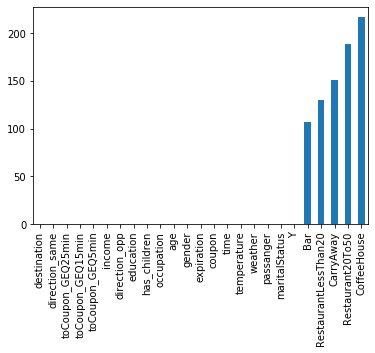

In [53]:
# Repeat the sorting from above to get the adjusted null quantities
dataFilt.isnull().sum().sort_values().plot(kind = 'bar')

# Show the data where 'CoffeeHouse' is null
dataFilt[dataFilt['CoffeeHouse'].isnull()]

# Because the null entries are now all related to patronage of specific businesses I think it may be appropriate to replace
# the NaN values with zeroes, but for now I think we will retain them, dropping as needed

4. What proportion of the total observations chose to accept the coupon? 



In [54]:
# The proportion of acceptors is the number of those who said Yes, divided by the number of interviewees
propAccept = 100*len(dataFilt[dataFilt['Y']==1])/len(dataFilt)

# Print the proportion formatted to 2 decimal points
print("The percentage of total acceptors was %.2f"%propAccept)

The percentage of total acceptors was 56.84


5. Use a bar plot to visualize the `coupon` column.

In [55]:
dataFilt.groupby('coupon').count()

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
coupon,,,,,,,,,,,,,,,,,,,,,
Bar,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,1978,1993,1994,1981,2017,2017,2017,2017,2017,2017
Carry out & Take away,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,...,2361,2371,2375,2360,2393,2393,2393,2393,2393,2393
Coffee House,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,...,3924,3939,3946,3941,3996,3996,3996,3996,3996,3996
Restaurant(20-50),1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,...,1465,1478,1480,1470,1492,1492,1492,1492,1492,1492
Restaurant(<20),2786,2786,2786,2786,2786,2786,2786,2786,2786,2786,...,2739,2752,2759,2743,2786,2786,2786,2786,2786,2786


Text(0, 0.5, 'Number of Accepted Coupons')

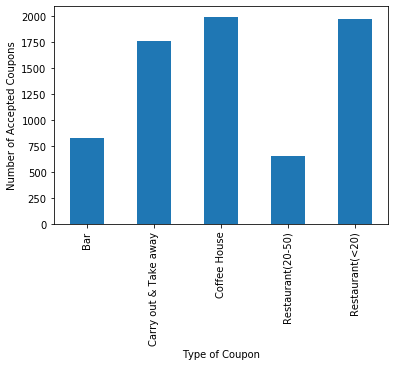

In [56]:
couponSums = dataFilt.groupby('coupon')['Y'].sum()
couponSums.plot(kind='bar')
plt.xlabel('Type of Coupon')
plt.ylabel('Number of Accepted Coupons')

Text(0, 0.5, 'Number of Issued Coupons')

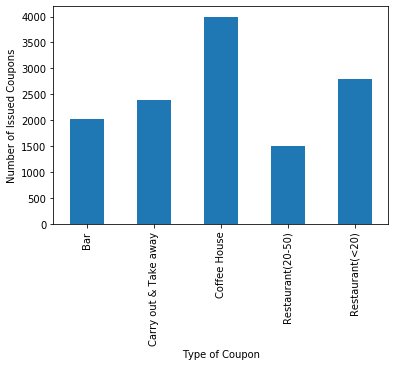

In [57]:
couponTries = dataFilt.groupby('coupon')['Y'].count()
couponTries.plot(kind='bar')
plt.xlabel('Type of Coupon')
plt.ylabel('Number of Issued Coupons')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Tempearture (F)')

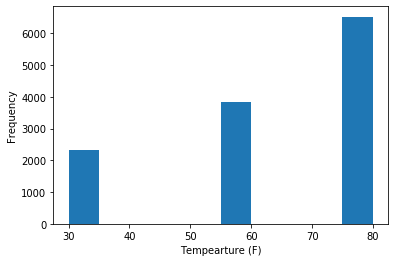

In [58]:
dataFilt['temperature'].plot(kind='hist')
plt.xlabel('Tempearture (F)')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [59]:
# Only use the "Bar" coupons
barDF = dataFilt[dataFilt['coupon']=='Bar']
barDF['Bar'].unique() # Print the unique values

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

2. What proportion of bar coupons were accepted?


In [60]:
barProp = len(barDF[barDF['Y']==1])/len(barDF)
print('%.2f'%(100*barProp))#, len(barDF))

41.00


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [61]:
possList = ["never", "less1", "1~3"] # List of entries for 3 or fewer times a month
bar3orLess = barDF.loc[barDF['Bar'].isin(possList)] # Only grab those entries fewer than 3 a month
barProp3orLess = len(bar3orLess)/len(barDF) 
print('%.2f'%(100*barProp3orLess))#, len(bar3orLess))

89.09


In [62]:
possList = ["gt8", "4~8"]
bar4orMore = barDF.loc[barDF['Bar'].isin(possList)]
barProp4orMore = len(bar4orMore)/len(barDF)
print('%.2f'%(100*barProp4orMore))#, len(bar4orMore))

9.87


In [63]:
barDF['age'].unique() # Print unique ages

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [64]:
possBarList = ["1~3", "gt8", "4~8"]
possAgeList = ['46', '26', '31', '41', '50plus', '36']
bar4 = barDF.loc[(barDF['Bar'].isin(possBarList)) & (barDF['age'].isin(possAgeList))]

barProp4 = len(bar4)/len(barDF)
print('%.2f'%(100*barProp4))#, len(bar4))

20.82


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [65]:
barDF['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [66]:
barDF['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [67]:
possBarList = ["1~3", "gt8", "4~8"]
possPassList = ['Alone', 'Friend(s)', 'Partner']
possOccList = ['Farming Fishing & Forestry']
bar5 = barDF.loc[(barDF['Bar'].isin(possBarList)) & (barDF['passanger'].isin(possPassList)) & (~barDF['occupation'].isin(possOccList))]

barProp5 = len(bar5)/len(barDF)
print('%.2f'%(100*barProp5), len(barDF))

27.32 2017


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [68]:
possBarList = ["1~3", "gt8", "4~8"]
possPassList = ['Alone', 'Friend(s)', 'Partner']
possOccList = ['Widowed']
bar6 = barDF.loc[(barDF['Bar'].isin(possBarList)) & (barDF['passanger'].isin(possPassList)) & (~barDF['maritalStatus'].isin(possOccList))]

barProp6 = len(bar6)/len(barDF)
print('%.2f'%(100*barProp6), len(barDF))

27.32 2017


In [69]:
possBarList = ["1~3", "gt8", "4~8"]
possAgeList = ['21', '26', 'below21']
bar7 = barDF.loc[(barDF['Bar'].isin(possBarList)) & (barDF['age'].isin(possAgeList))]

barProp7 = len(bar7)/len(barDF)
print('%.2f'%(100*barProp7), len(barDF))

17.10 2017


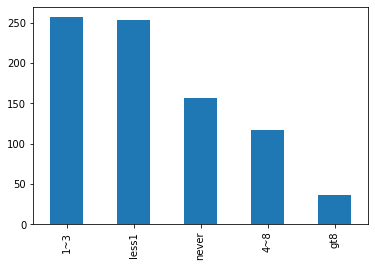

In [70]:
barDF[barDF['Y']==1]['Bar'].value_counts().plot(kind='bar')

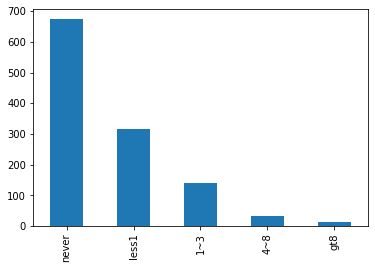

In [71]:
barDF[barDF['Y']==0]['Bar'].value_counts().plot(kind='bar')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Although people who frequent bars the most are the least common respondants to the survey they are most likely to take the coupon.
1) Perhaps unsurprisingly, this indicates that people who are already intersted in bars take the coupons.

2) Conversely we see that the people who never attend bars are very unlikely to take the coupon.

3) Interestingly, the data seem to suggest that people who rarely attend bars are reasonably likely to take the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [72]:
# Clean the data up so our labels are nice by default
dataFilt['CarryAway'] = dataFilt['CarryAway'].replace({'gt8': '>8', 'less1': '<1', 'never': 'Never'})
dataFilt['Restaurant20To50'] = dataFilt['Restaurant20To50'].replace({'gt8': '>8', 'less1': '<1', 'never': 'Never'})
dataFilt['RestaurantLessThan20'] = dataFilt['RestaurantLessThan20'].replace({'gt8': '>8', 'less1': '<1', 'never': 'Never'})
dataFilt['destination'] = dataFilt['destination'].replace({'No Urgent Place': 'Else', 'less1': '<1', 'never': 'Never'})
dataFilt['Bar'] = dataFilt['Bar'].replace({'gt8': '>8', 'less1': '<1', 'never': 'Never'})
dataFilt['CoffeeHouse'] = dataFilt['CoffeeHouse'].replace({'gt8': '>8', 'less1': '<1', 'never': 'Never'})
dataFilt['education'] = dataFilt['education'].replace({'Associates degree':'Associates', 'Bachelors degree':'Bachelors', 'Graduate degree (Masters or Doctorate)': 'Graduate', 'Some college - no degree':'Some College', 'Some High School':'Some HS', 'High School Graduate':'High School'})

In [73]:
dataFilt = dataFilt.rename(columns={"passanger": "Passenger", "education": "Education", "income":"Income"})
dataFilt = dataFilt.rename(columns={"weather":"Weather", "time":"Time", "destination":"Destination", "age":"Age"})
dataFilt = dataFilt.rename(columns={"maritalStatus":"Marital Status", "temperature":"Temperature", "gender":"Gender"})
dataFilt = dataFilt.rename(columns={"has_children":"Has Children", "direction_same":"Direction Same", "direction_opp":"Direction Opp"})

In [74]:
# Separate the data for Restaurants
carryDF = dataFilt[dataFilt['coupon']=='Carry out & Take away'].dropna() # Drop null data
carryDF['CarryAway'].unique() # Check unique entries

array(['4~8', '1~3', '>8', '<1', 'Never'], dtype=object)

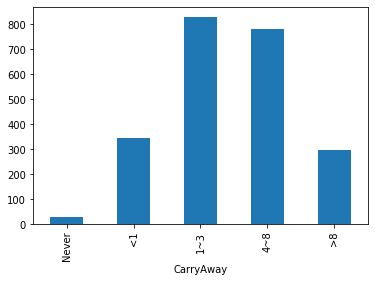

In [75]:
# Look at how often people are getting carry away
carryNums = carryDF.groupby('CarryAway')['Y'].count().reindex(["Never", "<1", "1~3", "4~8", ">8"])
carryNums.plot(kind='bar')

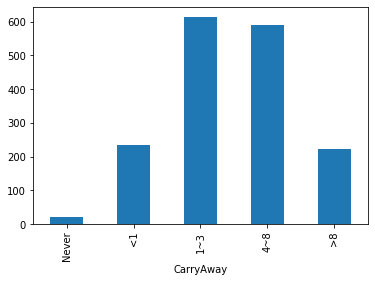

In [76]:
# Look at how often people are getting carry away and taking a coupon
carrySums = carryDF.groupby('CarryAway')['Y'].sum().reindex(["Never", "<1", "1~3", "4~8", ">8"])
carrySums.plot(kind='bar')

In [77]:
carrySums

CarryAway
Never     22
<1       233
1~3      614
4~8      590
>8       223
Name: Y, dtype: int64

In [78]:
# Merge the sum and the count columns
props = pd.merge(left=carryNums, right=carrySums, left_on='CarryAway', right_on='CarryAway', how='outer')
props

,Y_x,Y_y
CarryAway,,
Never,28,22
<1,343,233
1~3,830,614
4~8,783,590
>8,296,223


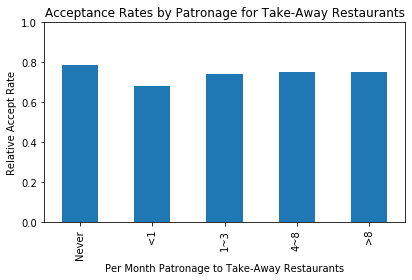

In [79]:
# Look at how often people are coupons based on their carry away habits
props['Proportions'] = props['Y_y']/props['Y_x']
props['Proportions'].plot(kind='bar')
plt.xlabel("Per Month Patronage to Take-Away Restaurants")
plt.ylabel('Relative Accept Rate')
plt.title("Acceptance Rates by Patronage for Take-Away Restaurants")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Take-Away_AcceptanceRates.png", dpi=150)
#props.plot(kind='bar', x='CarryAway',y='Proportions')

In [80]:
# Interesting that the rate of acceptance has little to do with the frequency one eats carry away food
# How do the rates of other coupon uses compare?
# Get all coupon types
#dataFilt['coupon'].unique()

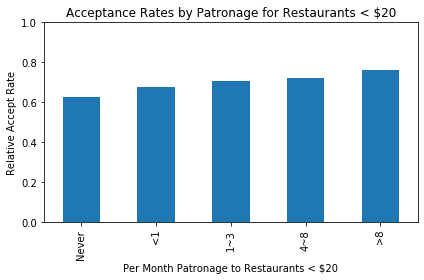

In [81]:
# Let's repeat the steps from above with each of the other coupon types
restCheapDF = dataFilt[dataFilt['coupon']=='Restaurant(<20)'].dropna() # Drop null data

# Reindex the values from least to most frequent
restCheapNums = restCheapDF.groupby('RestaurantLessThan20')['Y'].count().reindex(["Never", "<1", "1~3", "4~8", ">8"])
restCheapSums = restCheapDF.groupby('RestaurantLessThan20')['Y'].sum().reindex(["Never", "<1", "1~3", "4~8", ">8"])

# Merge the sum and the count columns
props = pd.merge(left=restCheapNums, right=restCheapSums, left_on='RestaurantLessThan20', right_on='RestaurantLessThan20', how='outer')
props['Proportions'] = props['Y_y']/props['Y_x']
props['Proportions'].plot(kind='bar')

# Plot
plt.ylim(0,1) # Fix axes for apples-to-apples comparison across coupon types
plt.ylabel('Relative Accept Rate')
plt.xlabel('Per Month Patronage to Restaurants < $20')
plt.title("Acceptance Rates by Patronage for Restaurants < $20")
plt.tight_layout() # Make sure labels all fit
plt.savefig("CheapRestaurants_AcceptanceRates.png", dpi=150)

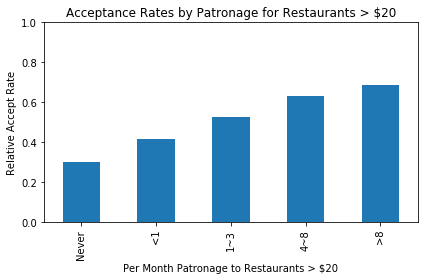

In [82]:
restExpDF = dataFilt[dataFilt['coupon']=='Restaurant(20-50)'].dropna() # Drop null data
restExpNums = restExpDF.groupby('Restaurant20To50')['Y'].count().reindex(["Never", "<1", "1~3", "4~8", ">8"])
restExpSums = restExpDF.groupby('Restaurant20To50')['Y'].sum().reindex(["Never", "<1", "1~3", "4~8", ">8"])
# Merge the sum and the count columns
props = pd.merge(left=restExpNums, right=restExpSums, left_on='Restaurant20To50', right_on='Restaurant20To50', how='outer')
props['Proportions'] = props['Y_y']/props['Y_x']
props['Proportions'].plot(kind='bar')
plt.ylim(0,1)
plt.ylabel('Relative Accept Rate')
plt.xlabel('Per Month Patronage to Restaurants > $20')
plt.title("Acceptance Rates by Patronage for Restaurants > $20")
plt.tight_layout()
plt.savefig("ExppRestaurants_AcceptanceRates.png", dpi=150)

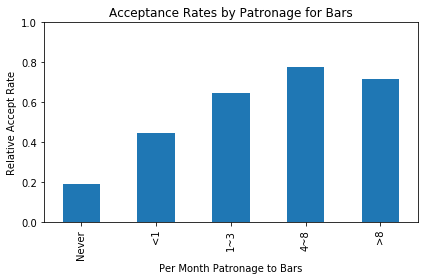

In [83]:
barDF = dataFilt[dataFilt['coupon']=='Bar'].dropna() # Drop null data
barNums = barDF.groupby('Bar')['Y'].count().reindex(["Never", "<1", "1~3", "4~8", ">8"])
barSums = barDF.groupby('Bar')['Y'].sum().reindex(["Never", "<1", "1~3", "4~8", ">8"])
# Merge the sum and the count columns
props = pd.merge(left=barNums, right=barSums, left_on='Bar', right_on='Bar', how='outer')
props['Proportions'] = props['Y_y']/props['Y_x']
props['Proportions'].plot(kind='bar')
plt.ylim(0,1)
plt.ylabel('Relative Accept Rate')
plt.xlabel('Per Month Patronage to Bars')
plt.title("Acceptance Rates by Patronage for Bars")
plt.tight_layout()
plt.savefig("Bars_AcceptanceRates.png", dpi=150)

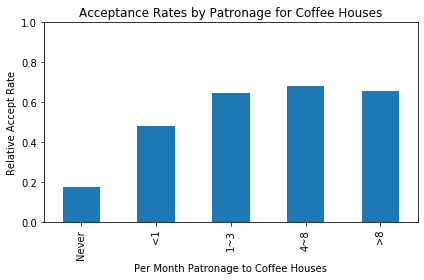

In [84]:
coffDF = dataFilt[dataFilt['coupon']=='Coffee House'].dropna() # Drop null data
coffNums = coffDF.groupby('CoffeeHouse')['Y'].count().reindex(["Never", "<1", "1~3", "4~8", ">8"])
coffSums = coffDF.groupby('CoffeeHouse')['Y'].sum().reindex(["Never", "<1", "1~3", "4~8", ">8"])
# Merge the sum and the count columns
props = pd.merge(left=coffNums, right=coffSums, left_on='CoffeeHouse', right_on='CoffeeHouse', how='outer')
props['Proportions'] = props['Y_y']/props['Y_x']
props['Proportions'].plot(kind='bar')
plt.ylim(0,1)
plt.ylabel('Relative Accept Rate')
plt.xlabel('Per Month Patronage to Coffee Houses')
plt.title("Acceptance Rates by Patronage for Coffee Houses")
plt.tight_layout()
plt.savefig("CoffeeHouses_AcceptanceRates.png", dpi=150)

### The most interesting trend to me is the lack of correlation in the case of take-away coupons
For Coffee Houses and Bars the acceptance rate trends upwards until the >8 category where it dips

For Restaurants of both types a given driver accepts more readily if they are patronizing the business

I want to answer the question:

# What DOES affect the likelihood somebody accepts a take-away coupon?

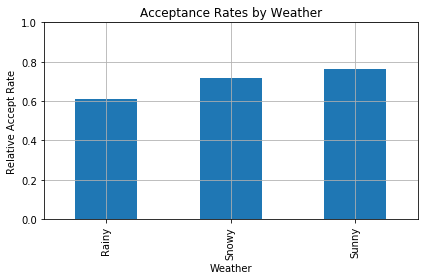

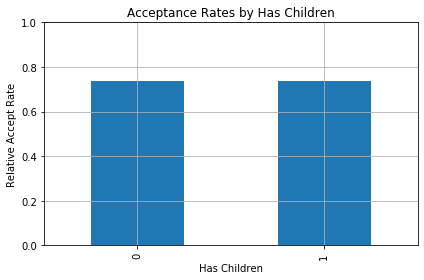

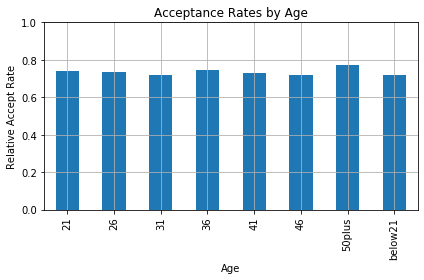

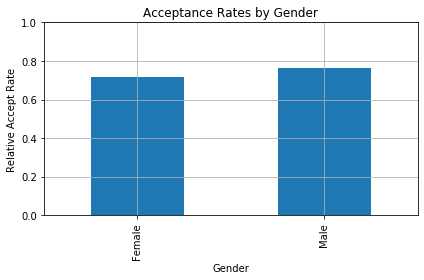

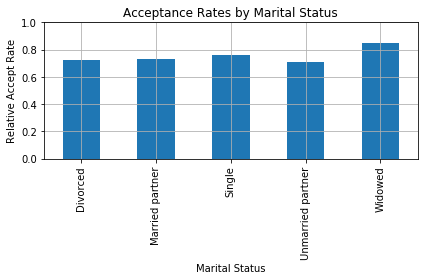

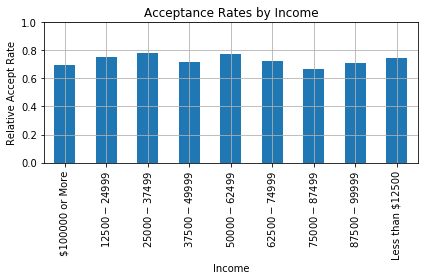

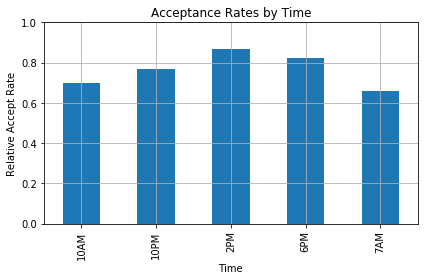

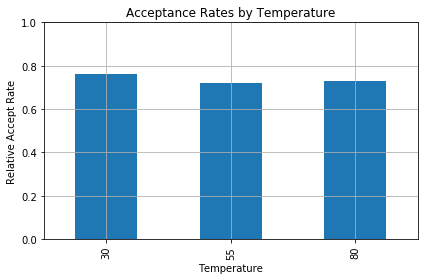

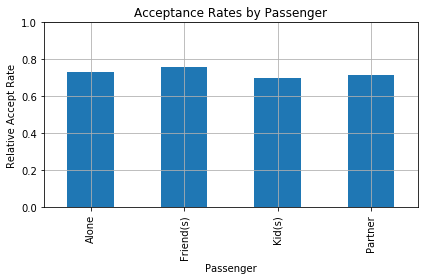

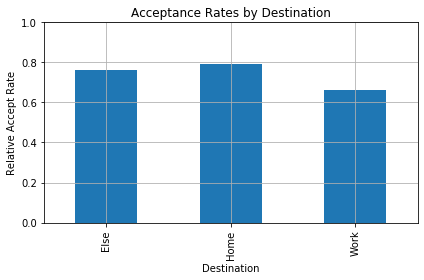

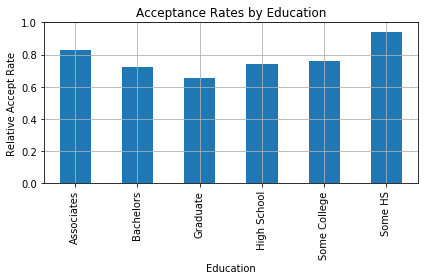

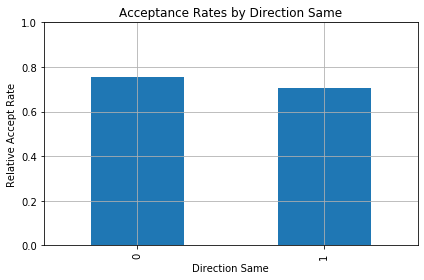

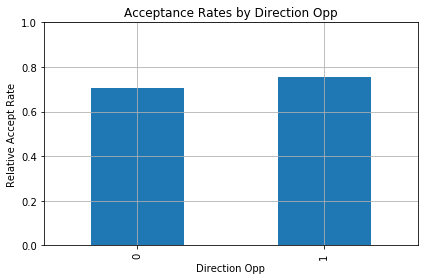

In [85]:
### This loop will iterate through each of the named categories and generate a barplot for the relative acceptance rate
### By changing the dataframe I am able to easily generate all the combinations and look for any stand-out trends
dfList = [carryDF, barDF, coffDF, restExpDF, restCheapDF] # List the 5 coupon-specific dataframes
DF = dfList[0]

# Iterate through each column of interest
for str_ in ['Weather', 'Has Children', 'Age', 'Gender', 'Marital Status',
             'Income', 'Time', 'Temperature', 'Passenger', 'Destination',
             'Education', 'Direction Same', 'Direction Opp']:
    
    Sums = DF.groupby(str_)['Y'].sum() # get the num of 'yes' responses
    Nums = DF.groupby(str_)['Y'].count() # get the total num of responses
    
    props = pd.merge(left=Nums, right=Sums, left_on=str_, right_on=str_, how='outer') # merge
    props['Proportions'] = props['Y_y']/props['Y_x'] # divide for the rates
    
    plt.figure()
    props['Proportions'].plot(kind='bar') # Plot the outcome
    plt.ylim(0,1) # limit y axis to 0-1
    plt.ylabel('Relative Accept Rate') 
    plt.title("Acceptance Rates by %s"%str_)
    plt.grid()
    plt.tight_layout()
    plt.savefig("CarryOutPlots/%s.png"%(str_), dpi=150)
    #plt.close()

### So, what affects the likelihood somebody will accept a coupon for Take-Out?

1) Weather: If the weather is Sunny participants were more likely to accept the coupon.

2) Time of Day: It looks like people are more likely to accept coupons for Take-Away in the Afternoon (2pm) and Evening (6pm and 10pm). This could indicate that Take-Away is considered a poor breakfast option

3) Destination: Participants were more likely to accept Take-Away coupons on their way home than they were on their way to work.

4) Direction: Participants were more likely to accept a coupon if they were already headed in the direction of the Take-Away, although not as dramatically as one might have hypothesized. It is interesting to note the symmetry of the graphs indicating directionality has symmetric impact (i.e. It's just as difficult as it is to turn-around as it is easy to carry-on forward, may have learnt some behavioural insight if that weren't the case).

5) Education: It seems that broadly speaking, the more educational background a participant has the less likely they are to accept a coupon for take-away. The exception is the Associates degree holders who are more likely to accept than their educational background may suggest.

### So, what does NOT affect the likelihood somebody will accept a coupon for Take-Out?

1) Frequency of patronizing Take-Out restaurants: We already covered this earlier in the notebook, but unlike the other businesses for which coupons were issued, Take-Out restaurants' acceptance rates did not seem to depend on the frequency with which the participants visited Take-Out restaurants. Not to belabour a point, but this is very interesting and shows some universality of the appeal of Take-Out; it does not seem to be a niche market.

2) Income: Although the rate of acceptance changes amongst income levels it does not follow any particular trend and so I would suggest the variability is likely random.

3) Passenger: Participants were marginally more likely to accept Take-Away coupons if their passenger was a friend, but again it looks like the variability here is quite small and so the impact of the passenger seems to be nearly negligible.

4) Gender: Male and Female participants accepted Take-Away coupons with very similar frequency. Males were more likely to accept, but not significantly so.

5) Has Kids: This came as a surprise because I presumed people with children were more attracted to not cooking, evidently that's balanced by another force (maybe budgetary restraints?). It looks like whether or not one has children is negligibly impactful on their decision to accept Take-Away coupons.